#### World Happiness Report - Vinayak Ratan

## Predicting the Happiness score 

World Happiness Report
Problem Statement:
Context

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

You need to predict the happiness score considering all the other factors mentioned in the dataset. 

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Reading the world happiness data set
happy_score_df = pd.read_csv('happiness_score_dataset.csv')
happy_score_df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


- 1. We need to predict the "Happiness score" based on the given other factors.
- 2. But the position of the column to be predicted is located at column index 3, we need to change it to position 11

In [3]:
# First remove the column from the dataset by storing it in some other variable
move = happy_score_df.pop('Happiness Score') 
happy_score_df.sample() # To check

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
22,Venezuela,Latin America and Caribbean,23,0.06476,1.04424,1.25596,0.72052,0.42908,0.11069,0.05841,3.19131


In [4]:
happy_score_df.insert(11, "Happiness Score", move)
happy_score_df.sample() # To check

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
18,Belgium,Western Europe,19,0.03595,1.30782,1.28566,0.89667,0.5845,0.2254,0.2225,2.41484,6.937


In [5]:
# Dropping the Happiness rank column since rank is given based on happiness score 
happy_score_df.drop('Happiness Rank', axis = 1, inplace = True)

In [6]:
#Checking for type of dataset
type(happy_score_df)

pandas.core.frame.DataFrame

In [7]:
# Head of dataset
happy_score_df.head()

,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,Switzerland,Western Europe,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,Iceland,Western Europe,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,Denmark,Western Europe,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,Norway,Western Europe,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,Canada,North America,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427


In [8]:
# Tail of dataset
happy_score_df.tail()

,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
153,Rwanda,Sub-Saharan Africa,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,3.465
154,Benin,Sub-Saharan Africa,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,3.340
155,Syria,Middle East and Northern Africa,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,3.006
156,Burundi,Sub-Saharan Africa,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2.905
157,Togo,Sub-Saharan Africa,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726,2.839


In [9]:
# names of columns
happy_score_df.columns

Index(['Country', 'Region', 'Standard Error', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual',
       'Happiness Score'],
      dtype='object')

#### Checking for null values

In [10]:
happy_score_df.isnull()

,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
153,False,False,False,False,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False,False,False,False,False
156,False,False,False,False,False,False,False,False,False,False,False


In [11]:
happy_score_df.isnull().sum()

Country                          0
Region                           0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Happiness Score                  0
dtype: int64

- There are no null values in the given dataset, hence no need to apply imputation methods

## Exploratory Data Analysis (EDA)

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


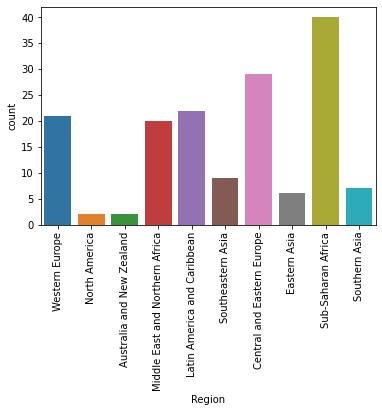

In [12]:
# Identifying the regions 
sns.countplot(x ='Region', data = happy_score_df)
plt.xticks(rotation='vertical')
print(happy_score_df['Region'].value_counts())

- Out of total 159 countries, there are 10 regions with more countries present in 'Sub-Saharan Africa' = 40, followed by 'Central and Eastern Europe'= 22 and so on
- Least countries in the region 'North America'= 2 and 'Australia and New Zealand' =2

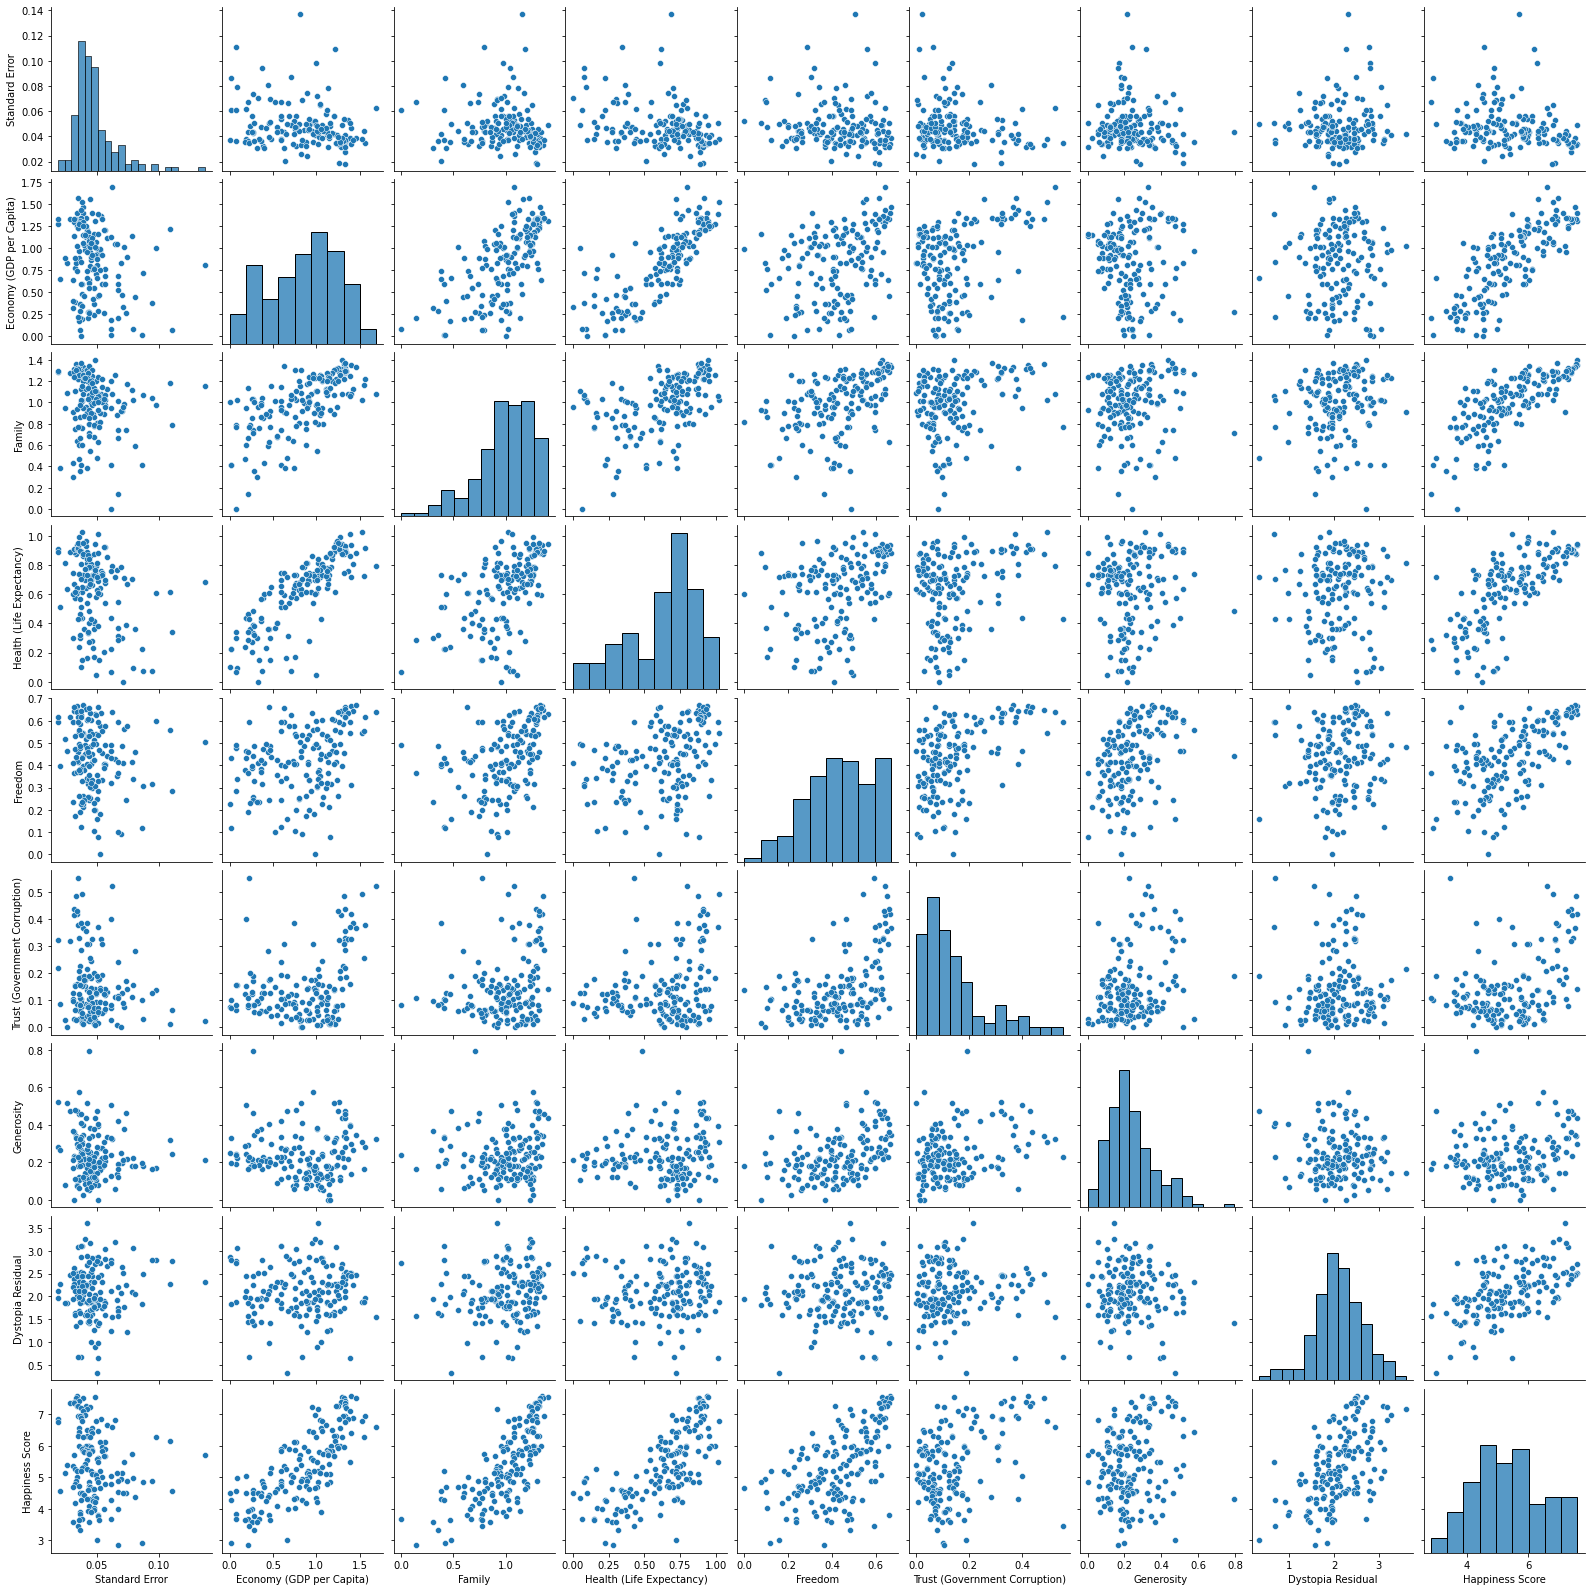

In [14]:
sns.pairplot(happy_score_df)
plt.savefig('HappinessPairplot.png')
plt.show()

The last column and row in the pairplot shows the scatter plot of target variable with the independent variables except the plot with itself which is a histogram
- Following observations can be done 
    - with increase in Economy(GDP per Capita), Family, Health (Life Expectency), Freedom, Dystopia residual the happiness score increases. For better understanding we need to see the correlation of these variables

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Western Europe'),
  Text(1, 0, 'North America'),
  Text(2, 0, 'Australia and New Zealand'),
  Text(3, 0, 'Middle East and Northern Africa'),
  Text(4, 0, 'Latin America and Caribbean'),
  Text(5, 0, 'Southeastern Asia'),
  Text(6, 0, 'Central and Eastern Europe'),
  Text(7, 0, 'Eastern Asia'),
  Text(8, 0, 'Sub-Saharan Africa'),
  Text(9, 0, 'Southern Asia')])

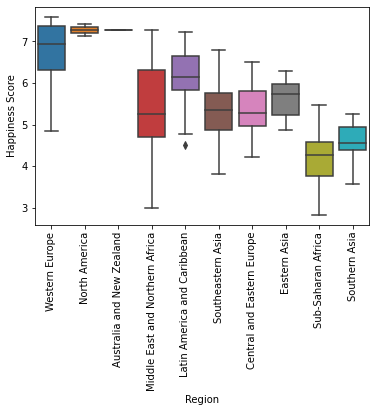

In [15]:
sns.boxplot(x='Region', y = 'Happiness Score', data=happy_score_df)
plt.xticks(rotation='vertical')

- From the above plot we can observe that
    - Regions with lower happiness: Sub-Saharan Africa, Southern Asia
    - Regions with higher happiness: Western Europe,North America, Australia and New Zealand
    - Regions with mid range happiness: Latin America and Caribbean,Southeastern Asia, Central and Eastern Europe, Eastern Asia
    - Region with low to high happiness: Middle East and Northern Africa

### Correlation

In [18]:
happy_score_df.corr()

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
Standard Error,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981,-0.177254
Economy (GDP per Capita),-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059,0.780966
Family,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117,0.740605
Health (Life Expectancy),-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979,0.724200
Freedom,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783,0.568211
Trust (Government Corruption),-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105,0.395199
Generosity,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301,0.180319
Dystopia Residual,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000,0.530474
Happiness Score,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474,1.000000


In [19]:
happy_score_df.corr()['Happiness Score'].sort_values()

Standard Error                  -0.177254
Generosity                       0.180319
Trust (Government Corruption)    0.395199
Dystopia Residual                0.530474
Freedom                          0.568211
Health (Life Expectancy)         0.724200
Family                           0.740605
Economy (GDP per Capita)         0.780966
Happiness Score                  1.000000
Name: Happiness Score, dtype: float64

<AxesSubplot:>

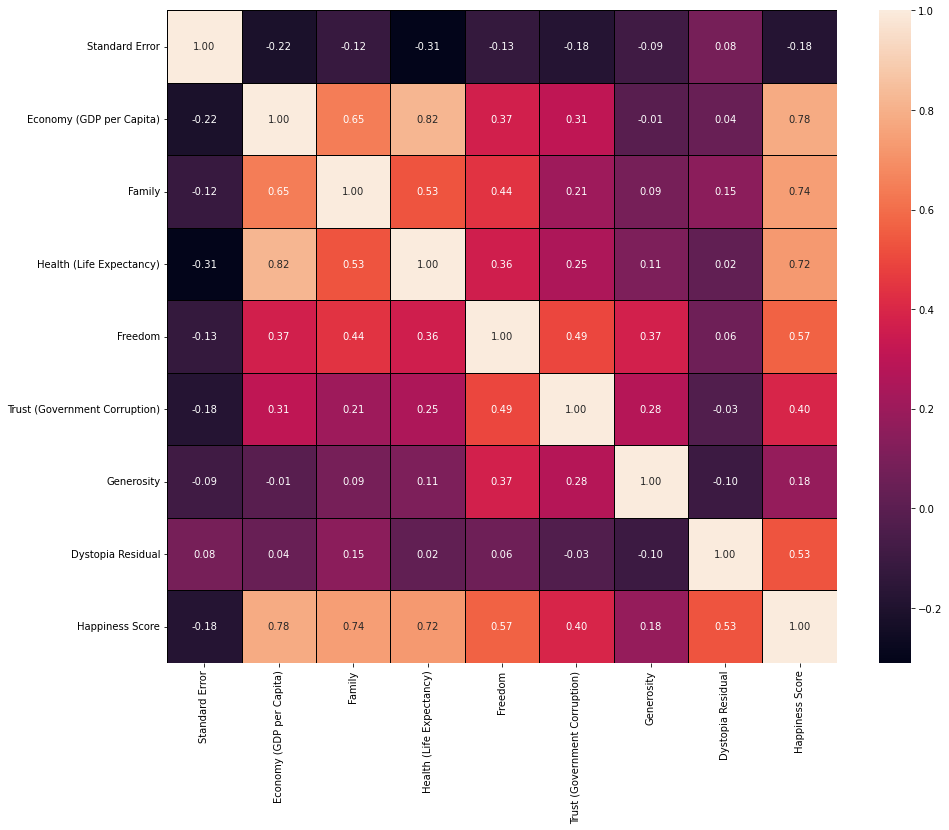

In [20]:
# Heatmap
plt.figure(figsize=(15,12))
sns.heatmap(happy_score_df.corr(), annot=True, linewidth=0.5,linecolor='black', fmt='.2f')

##### Outcome of correlation
- Data with negative correlation with target variable
    - Happiness rank has the strong negative correlation
    - Standard Error has good bond
- Data with positive correlation with target variable 
    - Economy (GDP per capita), Family, Health (life expectancy) have a very strong bond 
    - Freedom, Dystopia Residual, Trust (Government Corruption) also have a strong bond
    - Generosity has a good bond 

### Descriptive Statistics

In [21]:
happy_score_df.describe()

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977,5.375734
std,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550,1.145010
min,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2.839000
25%,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410,4.526000
50%,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415,5.232500
75%,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415,6.243750
max,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140,7.587000


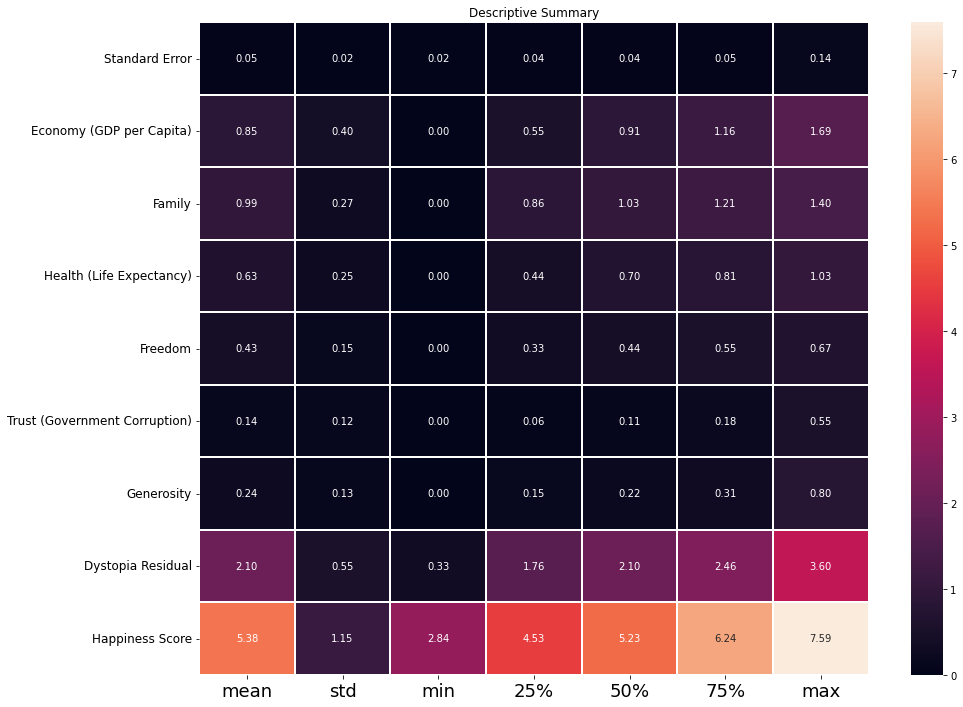

In [22]:
plt.figure(figsize=(15,12))
sns.heatmap(round(happy_score_df.describe()[1:].transpose(),2),linewidth=2, annot=True,fmt='.2f')
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 12)
plt.title("Descriptive Summary")
plt.savefig('Heatmap_desc_happiness.png')
plt.show()

In [23]:
# information of columns
happy_score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Standard Error                 158 non-null    float64
 3   Economy (GDP per Capita)       158 non-null    float64
 4   Family                         158 non-null    float64
 5   Health (Life Expectancy)       158 non-null    float64
 6   Freedom                        158 non-null    float64
 7   Trust (Government Corruption)  158 non-null    float64
 8   Generosity                     158 non-null    float64
 9   Dystopia Residual              158 non-null    float64
 10  Happiness Score                158 non-null    float64
dtypes: float64(9), object(2)
memory usage: 13.7+ KB


### Encoding the categorical variables

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

lst = ['Country','Region']
for val in lst:
    happy_score_df[val]=le.fit_transform(happy_score_df[val].astype(str))

happy_score_df

,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,135,9,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,58,9,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,37,9,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,105,9,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,24,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427
...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,3.465
154,13,8,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,3.340
155,136,4,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,3.006
156,21,8,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2.905


In [25]:
happy_score_df.dtypes

Country                            int32
Region                             int32
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Happiness Score                  float64
dtype: object

### Checking outliers

In [26]:
col = happy_score_df.columns[2:].values
col

array(['Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual',
       'Happiness Score'], dtype=object)

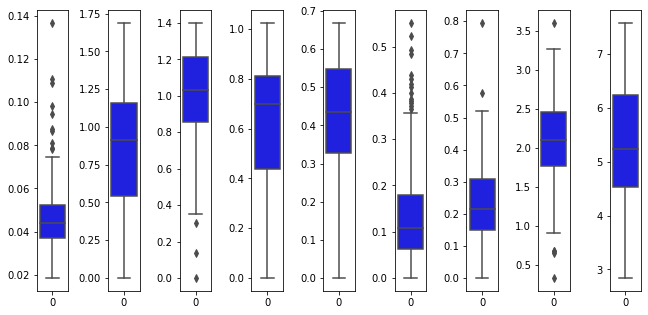

In [27]:
# Box Plot
plt.figure(figsize=(30,60))
for i in range (0, len(col)):
    plt.subplot(14,30,i+1)
    sns.boxplot(data = happy_score_df[col[i]], color = 'blue', orient ='v')
    plt.tight_layout()

- Outliers are present in the following features 
    - Standard Error -  more outliers
    - Family - few
    - Trust (Government Corruption) - more outliers
    - Generosity - few
    - Dystopia Residual - few

### Removing Outliers

- Using z-score technique

In [28]:
from scipy.stats import zscore
z = np.abs(zscore(happy_score_df))
z

,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,1.238770,1.300256,0.805926,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258,1.937360
1,0.449465,1.300256,0.055889,1.135226,1.514458,1.289434,1.332456,0.016480,1.575856,1.092857,1.914581
2,0.909893,1.300256,0.854487,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335,1.884792
3,0.581016,1.300256,0.531526,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893,1.880411
4,1.194920,0.040302,0.722845,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337,1.797179
...,...,...,...,...,...,...,...,...,...,...,...
153,0.866043,0.965117,0.774917,1.552987,0.800520,0.818610,1.087740,3.413922,0.087228,2.588925,1.674055
154,1.436096,0.965117,0.662582,1.392303,2.346860,1.263362,0.372033,0.529210,0.433117,0.843967,1.783571
155,1.260695,0.375441,0.132534,0.455245,1.901086,0.372199,1.809238,0.381419,1.856891,3.208430,2.076199
156,1.260695,0.965117,2.263962,2.067566,2.118467,1.649648,2.064472,0.357715,0.316950,0.481985,2.164688


In [29]:
# List of array containing z-score greater than 3
np.where(z>3)

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64),
 array([7, 2, 2, 2, 8, 4, 7, 9, 4], dtype=int64))

In [30]:
z.shape

(158, 11)

In [31]:
z.iloc[153,8]

0.08722846138172975

In [32]:
happy_score_df_new = happy_score_df[(z<3).all(axis=1)]
happy_score_df_new

,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,135,9,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,58,9,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,37,9,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,105,9,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,24,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427
...,...,...,...,...,...,...,...,...,...,...,...
150,66,8,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723,3.655
151,20,8,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494,3.587
152,0,7,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,3.575
154,13,8,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,3.340


In [33]:
print("Old DataFrame:-", happy_score_df.shape)
print("New DataFrame:-", happy_score_df_new.shape)
print('Total dropped rows:-', happy_score_df.shape[0]-happy_score_df_new.shape[0])

Old DataFrame:- (158, 11)
New DataFrame:- (149, 11)
Total dropped rows:- 9


In [34]:
# Percentage loss of data
loss_percent_hs = (158-149)/149*100
print(loss_percent_hs,'%')

6.0402684563758395 %


- Since the data set is very small, we will not remove the outliers

### Skewness

In [35]:
happy_score_df.skew()

Country                          0.000000
Region                          -0.116119
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
Happiness Score                  0.097769
dtype: float64

- Outcome of skewness: Skewness threshold is taken as +/- 0.65
- columns which are having skewness - Standard Error, Family,Health (Life Expectancy),Trust (Government Corruption),Generosity

In [36]:
#### Normal distribtion curve

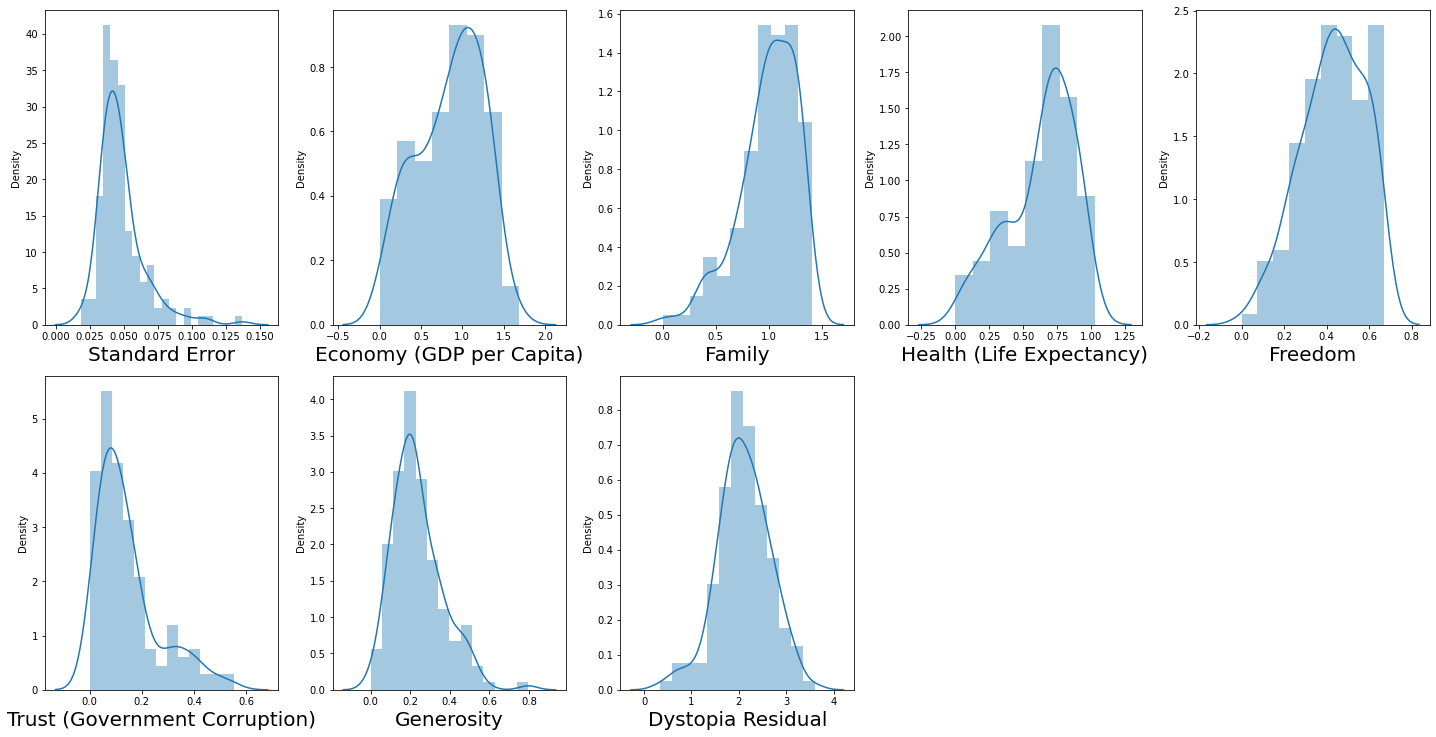

In [37]:
# Distribution Plot - Done for only numerical column not for categoical data
plt.figure(figsize=(20,25), facecolor ='white')
plot_no = 1
df_hs = happy_score_df.iloc[:,2:-1]
for column in df_hs:
    if plot_no <= 10:
        ax = plt.subplot(5,5,plot_no)
        sns.distplot(df_hs[column])
        plt.xlabel(column, fontsize = 20)

    plot_no += 1
plt.tight_layout()

- Most of the data is close to normal distribution with little skewness

### Dividing data in features & vectors

In [42]:
# Independent column
x = happy_score_df.iloc[:,:-1]
x.sample()

,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
96,78,8,0.09438,0.37545,1.04103,0.07612,0.31767,0.12504,0.16388,2.79832


In [43]:
# Target column
y = happy_score_df.iloc[:,-1]
y.head(3)

0    7.587
1    7.561
2    7.527
Name: Happiness Score, dtype: float64

### Transforming data to remove Skewness

In [44]:
from sklearn.preprocessing import power_transform
x = power_transform(x, method='yeo-johnson')
x

array([[ 1.17106926,  1.24453048, -0.9722262 , ...,  1.77399061,
         0.62239051,  0.75099154],
       [-0.3443269 ,  1.24453048,  0.30934969, ...,  0.31599326,
         1.48099498,  1.11001108],
       [-0.84509236,  1.24453048, -1.06201662, ...,  1.90679207,
         0.92797276,  0.70227525],
       ...,
       [ 1.18876946, -0.30300992,  0.39913742, ...,  0.73891461,
         1.65933595, -2.86621557],
       [-1.28332767,  0.95510156,  1.92690194, ..., -0.15194624,
        -0.19482942, -0.51480136],
       [ 1.27672507,  0.95510156,  1.31032295, ..., -0.06732623,
        -0.49041465, -0.97664547]])

### Scaling using Standard Scaler

In [45]:
# transforming data into standard normal distribution
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.17106926,  1.24453048, -0.9722262 , ...,  1.77399061,
         0.62239051,  0.75099154],
       [-0.3443269 ,  1.24453048,  0.30934969, ...,  0.31599326,
         1.48099498,  1.11001108],
       [-0.84509236,  1.24453048, -1.06201662, ...,  1.90679207,
         0.92797276,  0.70227525],
       ...,
       [ 1.18876946, -0.30300992,  0.39913742, ...,  0.73891461,
         1.65933595, -2.86621557],
       [-1.28332767,  0.95510156,  1.92690194, ..., -0.15194624,
        -0.19482942, -0.51480136],
       [ 1.27672507,  0.95510156,  1.31032295, ..., -0.06732623,
        -0.49041465, -0.97664547]])

In [46]:
x.mean()

-2.24855296126614e-18

In [47]:
x.std()

1.0

### Training the dataset

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
hap_lr = LinearRegression()
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [56]:
for i in range(0,100):
    x_train, x_test,y_train, y_test = train_test_split(x,y, random_state=i, test_size=0.20)
    hap_lr.fit(x_train, y_train)
    pred_train = hap_lr.predict(x_train)
    pred_test= hap_lr.predict(x_test)
    print('Mean absolute error:- ',mean_absolute_error(y_test, pred_test))
    print('Mean squared error:- ',mean_squared_error(y_test, pred_test))
    print('Root mean squared error:- ',np.sqrt(mean_squared_error(y_test, pred_test)))
    print(f'At random state {i}, the training accuracy is: {r2_score(y_train,pred_train)}')
    print(f'At random state {i}, the testing accuracy is: {r2_score(y_test,pred_test)}')
    print('*'*100,'\n')

Mean absolute error:-  0.06798094324415432
Mean squared error:-  0.007392048725615779
Root mean squared error:-  0.08597702440545253
At random state 0, the training accuracy is: 0.9931096895562709
At random state 0, the testing accuracy is: 0.9927708221038176
**************************************************************************************************** 

Mean absolute error:-  0.07121655540304807
Mean squared error:-  0.008734430134116117
Root mean squared error:-  0.09345817317985687
At random state 1, the training accuracy is: 0.9930998434931548
At random state 1, the testing accuracy is: 0.9924877121577581
**************************************************************************************************** 

Mean absolute error:-  0.06646027487380232
Mean squared error:-  0.007023952329717567
Root mean squared error:-  0.08380902296123949
At random state 2, the training accuracy is: 0.9923256224645587
At random state 2, the testing accuracy is: 0.9952772137559193
**************

In [57]:
x_train.shape

(126, 10)

In [58]:
y_train

6      7.378
51     5.889
40     6.168
49     5.948
97     4.885
       ...  
151    3.587
157    2.839
68     5.589
35     6.329
129    4.297
Name: Happiness Score, Length: 126, dtype: float64

In [59]:
x_test.shape

(32, 10)

In [60]:
y_test.shape

(32,)

In [63]:
# Linear regression for Random state = 6
x_train, x_test,y_train, y_test = train_test_split(x,y, random_state=6, test_size=0.20)
hap_lr.fit(x_train, y_train)
pred_train = hap_lr.predict(x_train)
pred_test= hap_lr.predict(x_test)
print('Mean absolute error:- ',mean_absolute_error(y_test, pred_test))
print('Mean squared error:- ',mean_squared_error(y_test, pred_test))
print('Root mean squared error:- ',np.sqrt(mean_squared_error(y_test, pred_test)))
print(f'At random state {i}, the training accuracy is: {r2_score(y_train,pred_train)}')
print(f'At random state {i}, the testing accuracy is: {r2_score(y_test,pred_test)}')
print('*'*100,'\n')

Mean absolute error:-  0.06864050703848816
Mean squared error:-  0.008005164710461397
Root mean squared error:-  0.08947158605088766
At random state 99, the training accuracy is: 0.9928537814778781
At random state 99, the testing accuracy is: 0.993423647994337
**************************************************************************************************** 



##### Cross Validation of the Linear Regression model

In [67]:
train_accuracy = r2_score(y_train, pred_train)
test_accuracy = r2_score(y_train, pred_train)
from sklearn.model_selection import cross_val_score
for j in range(2,6):
    cv_score_lr = cross_val_score(hap_lr, x,y,cv=j)
    cv_mean_lr = cv_score_lr.mean()
    print(f"At cross fold {j} the cv score is {cv_mean_lr} and accuracy score for training {train_accuracy} and accuracy for the testing is {test_accuracy}")
    print('\n') 

At cross fold 2 the cv score is 0.8475037326507848 and accuracy score for training 0.9928537814778781 and accuracy for the testing is 0.9928537814778781


At cross fold 3 the cv score is 0.8813443327176816 and accuracy score for training 0.9928537814778781 and accuracy for the testing is 0.9928537814778781


At cross fold 4 the cv score is 0.8364604599868111 and accuracy score for training 0.9928537814778781 and accuracy for the testing is 0.9928537814778781


At cross fold 5 the cv score is 0.798672071667379 and accuracy score for training 0.9928537814778781 and accuracy for the testing is 0.9928537814778781




- Cross validation 3 is giving better results than others

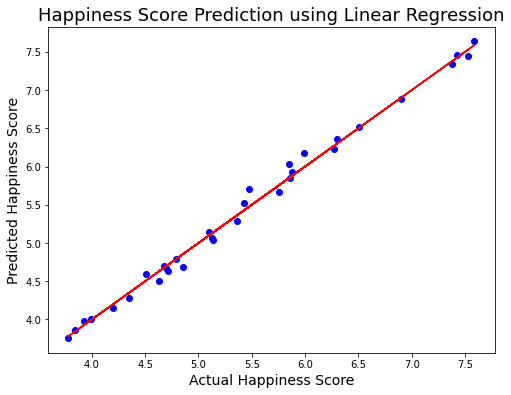

In [68]:
plt.figure(figsize=(8,6))
plt.scatter(x= y_test, y= pred_test, color='b')
plt.plot(y_test, y_test, color='r')
plt.xlabel("Actual Happiness Score", fontsize=14)
plt.ylabel("Predicted Happiness Score", fontsize=14)
plt.title("Happiness Score Prediction using Linear Regression", fontsize=18)
plt.savefig('lr_hap.png')

- Performance of the model is very good

### Regularization

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,10))}
ls_hap = Lasso()
clf_hap = GridSearchCV(ls_hap, parameters)
clf_hap.fit(x_train, y_train)
print(clf_hap.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [70]:
# Model training based on above best parameters, selected using GridSearchCV
ls_happy = Lasso(alpha = 0.001, random_state =0)
ls_happy.fit(x_train, y_train)
ls_score_training = ls_happy.score(x_train, y_train)
pred_ls_hap = ls_happy.predict(x_test)
ls_score_training*100

99.28487621518428

In [71]:
lss_happy = r2_score(y_test,pred_ls_hap)
lss_happy*100

99.35719560293774

In [72]:
cv_score_hap = cross_val_score(ls_happy,x,y, cv=3)
cv_mean_hap = cv_score_hap.mean()
cv_mean_hap*100

88.28925528409282

##### Since the models are predicting the score very well, choosing any one for deployment

In [73]:
import pickle
filename = 'Happy.pkl'
pickle.dump(ls_happy, open(filename,'wb'))

##### Conclusion

In [74]:
happy_model = pickle.load(open('Happy.pkl', 'rb'))
happy_result = happy_model.score(x_test, y_test)
print(happy_result*100)

99.35719560293774


In [75]:
happy_conclusion = pd.DataFrame([happy_model.predict(x_test)[:],y_test[:]], index=['Predicted', 'Original'])
happy_conclusion

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
Predicted,7.342402,7.447289,4.674195,5.146723,5.9293,4.637057,7.455839,7.632344,5.059559,6.226276,...,4.01234,5.851557,4.790754,4.698803,3.759773,4.148999,6.178852,5.66206,6.355125,5.51708
Original,7.378000,7.527000,4.694000,5.098000,5.8780,4.715000,7.427000,7.587000,5.129000,6.269000,...,3.99500,5.855000,4.786000,4.677000,3.781000,4.194000,5.987000,5.75900,6.295000,5.42900
